# EC1B1 Macroeconomics Coursework - Code

This notebook contains all the code for our EC1B1 Macroeconomics coursework. The code is divided into the following sections:

## 0. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

## 1. Load and Preprocess Data

We first load the Italy and USA data into separate dataframes.

In [2]:
italy_df = pd.read_excel('data/IMF_Italy.xlsx', header=1, index_col=0)
usa_df = pd.read_excel('data/IMF_US.xlsx', header=1, index_col=0)

### 1.1 Inspect Data

In [3]:
italy_df.head()

,"Economic Activity, Industrial Production, Index","Exchange Rates, National Currency Per U.S. Dollar, Period Average, Rate","International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
Jan 1960,31.134278,621.118012,2989.5,4.143942
Feb 1960,32.602650,621.118012,2958.5,4.136754
Mar 1960,33.712883,620.600000,2923.5,4.129566
Apr 1960,33.891953,625.000001,2959.5,4.125971
May 1960,34.632109,625.000001,2970.5,4.133160


In [4]:
usa_df.head()

,"International Reserves and Liquidity, Reserves, Official Reserve Assets, US Dollar","Prices, Consumer Price Index, All items, Index"
Jan 1960,21478.1,13.436946
Feb 1960,21395.7,13.482806
Mar 1960,21344.7,13.482806
Apr 1960,21278.0,13.528666
May 1960,21234.3,13.528666


We will shorten the column names for easier inspection and reference:

In [5]:
italy_df.columns = ['industrial_production_index', 'nominal_er_nat_currency_per_usd', 'reserves_in_usd', 'cpi']
usa_df.columns = ['reserves_in_usd', 'cpi']

In [6]:
italy_df.head()

,industrial_production_index,nominal_er_nat_currency_per_usd,reserves_in_usd,cpi
Jan 1960,31.134278,621.118012,2989.5,4.143942
Feb 1960,32.602650,621.118012,2958.5,4.136754
Mar 1960,33.712883,620.600000,2923.5,4.129566
Apr 1960,33.891953,625.000001,2959.5,4.125971
May 1960,34.632109,625.000001,2970.5,4.133160


In [7]:
usa_df.head()

,reserves_in_usd,cpi
Jan 1960,21478.1,13.436946
Feb 1960,21395.7,13.482806
Mar 1960,21344.7,13.482806
Apr 1960,21278.0,13.528666
May 1960,21234.3,13.528666


### 1.2 Merge Data

In [8]:
df = pd.merge(italy_df, usa_df, left_index=True, right_index=True, suffixes=('_italy', '_usa'))
df.head(20)

,industrial_production_index,nominal_er_nat_currency_per_usd,reserves_in_usd_italy,cpi_italy,reserves_in_usd_usa,cpi_usa
Jan 1960,31.134278,621.118012,2989.50,4.143942,21478.1,13.436946
Feb 1960,32.602650,621.118012,2958.50,4.136754,21395.7,13.482806
Mar 1960,33.712883,620.600000,2923.50,4.129566,21344.7,13.482806
Apr 1960,33.891953,625.000001,2959.50,4.125971,21278.0,13.528666
May 1960,34.632109,625.000001,2970.50,4.133160,21234.3,13.528666
Jun 1960,35.372264,625.000001,2997.50,4.133160,21169.8,13.574526
Jul 1960,33.891953,625.000001,3088.50,4.151131,20999.4,13.574526
Aug 1960,27.445439,625.000001,3201.50,4.158318,20803.4,13.574526
Sep 1960,35.002186,625.000001,3193.50,4.154724,20430.0,13.574526
Oct 1960,34.632109,625.000001,3174.50,4.154724,20068.2,13.666246


## 2. Identify Outliers

To identify outliers, we will use the IQR method. This involves establishing an upper and lower "fence" equal to 1.5 times the IQR above the third quartile and below the first quartile, respectively. Any data points that fall outside these fences should be considered outliers.

Fortunately, Matplotlib's boxplot function automatically visualises the presence of outliers in the indicators. We will create a boxplot for each indicator as a cursory inspection.

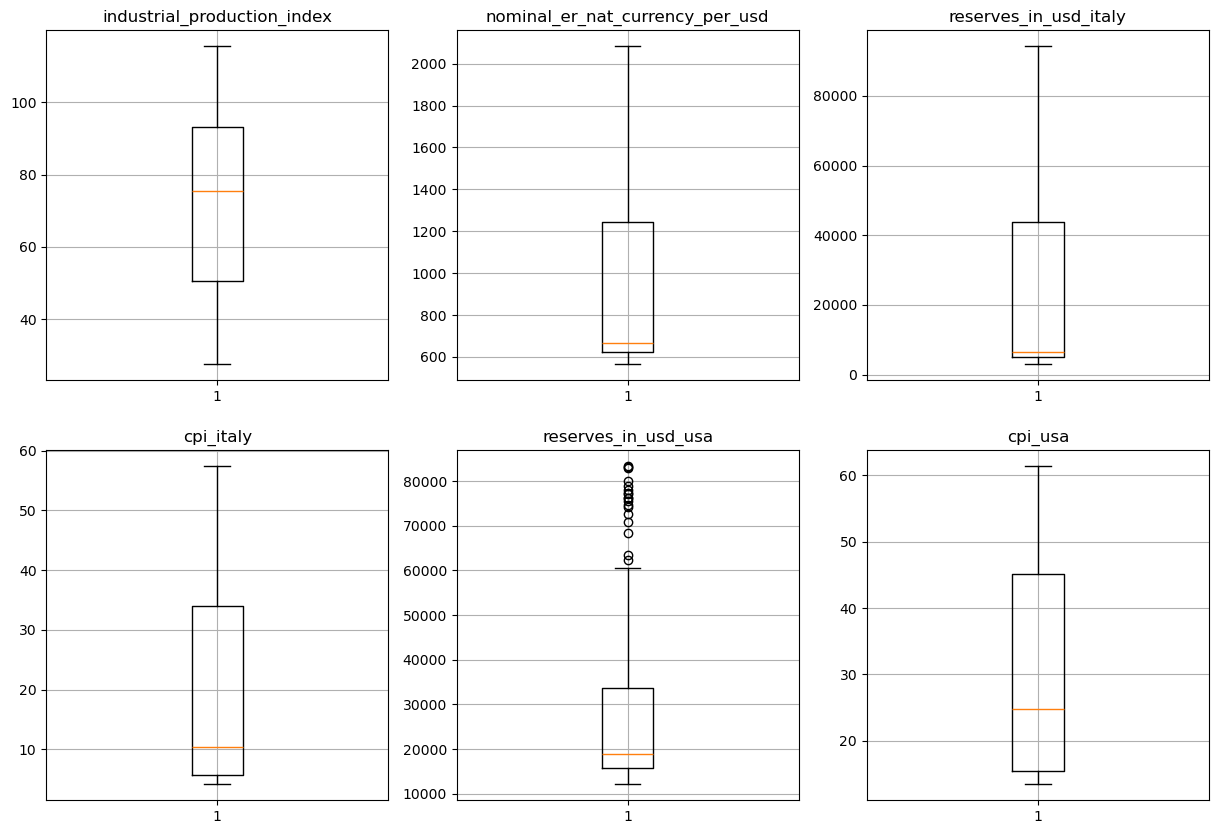

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (col, ax) in enumerate(zip(df.columns, axes)):
    ax.boxplot(df[col], showfliers=True)
    ax.set_title(col)
    ax.grid(True)
plt.show()

As seen above, there are a few outliers in the reserve value data for the USA and none anywhere else.

### 2.1 Create fences for downloaded indicators

In [10]:
fences = {}
for column in df.columns:
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    lower_fence = df[column].quantile(0.25) - 1.5 * iqr
    upper_fence = df[column].quantile(0.75) + 1.5 * iqr
    fences[column] = (lower_fence, upper_fence)

fences

{'industrial_production_index': (-13.510820006722973, 157.13080683321542),
 'nominal_er_nat_currency_per_usd': (-303.5037484375001, 2172.5062490625),
 'reserves_in_usd_italy': (-53640.7712438552, 102466.26074725347),
 'cpi_italy': (-36.96411504076126, 76.65163730045546),
 'reserves_in_usd_usa': (-11144.341994445569, 60571.50332407595),
 'cpi_usa': (-29.01210930244827, 89.53569160145011)}

### 2.2 Count Outliers

In [11]:
df.head()

,industrial_production_index,nominal_er_nat_currency_per_usd,reserves_in_usd_italy,cpi_italy,reserves_in_usd_usa,cpi_usa
Jan 1960,31.134278,621.118012,2989.5,4.143942,21478.1,13.436946
Feb 1960,32.602650,621.118012,2958.5,4.136754,21395.7,13.482806
Mar 1960,33.712883,620.600000,2923.5,4.129566,21344.7,13.482806
Apr 1960,33.891953,625.000001,2959.5,4.125971,21278.0,13.528666
May 1960,34.632109,625.000001,2970.5,4.133160,21234.3,13.528666


In [12]:
for column in df.columns:
    outlier_bool_array = (df[column] < fences[column][0]) | (df[column] > fences[column][1]) # boolean array checking if the value is outside the lower or upper fences
    print(column, '--', outlier_bool_array.sum()) # sum() counts the number of True values in the boolean array

industrial_production_index -- 0
nominal_er_nat_currency_per_usd -- 0
reserves_in_usd_italy -- 0
cpi_italy -- 0
reserves_in_usd_usa -- 18
cpi_usa -- 0


At first glance, there are 18 supposed outliers in US reserve value data! Closer inspection is required to determine whether these outliers should be removed, or whether they are valid data points representing significant events.

We will print the rows with outlier values.

In [13]:
df[(df['reserves_in_usd_usa'] < fences['reserves_in_usd_usa'][0]) | (df['reserves_in_usd_usa'] > fences['reserves_in_usd_usa'][1])]

,industrial_production_index,nominal_er_nat_currency_per_usd,reserves_in_usd_italy,cpi_italy,reserves_in_usd_usa,cpi_usa
Jul 1989,109.244545,1371.00,66068.137119,52.505319,63462.210506,57.049696
Aug 1989,50.939403,1383.52,68448.797116,52.632454,62363.845992,57.141416
Sep 1989,113.780981,1405.30,72466.001011,52.886714,68417.495745,57.324855
Oct 1989,113.076640,1369.23,72381.127961,53.310487,70808.689361,57.600015
Nov 1989,115.297106,1343.54,69992.121702,53.607125,72559.751651,57.737594
Dec 1989,106.582373,1293.59,73215.703682,53.819016,74608.633269,57.829314
Jan 1990,102.786093,1262.49,72854.222487,54.327535,75506.361462,58.425493
Feb 1990,103.430808,1244.01,72632.169921,54.751309,74173.524868,58.700652
Mar 1990,114.390974,1257.29,77994.863959,54.963200,76303.028540,59.021671
Apr 1990,99.746719,1239.94,79600.735077,55.175082,76283.210610,59.113391


Upon closer inspection, these "outliers" correspond to the last 18 months of USA international reserve data. Hence, these datapoints represent a large rise in the reserve value, rather than an error in the data, and should be kept in the dataset.

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

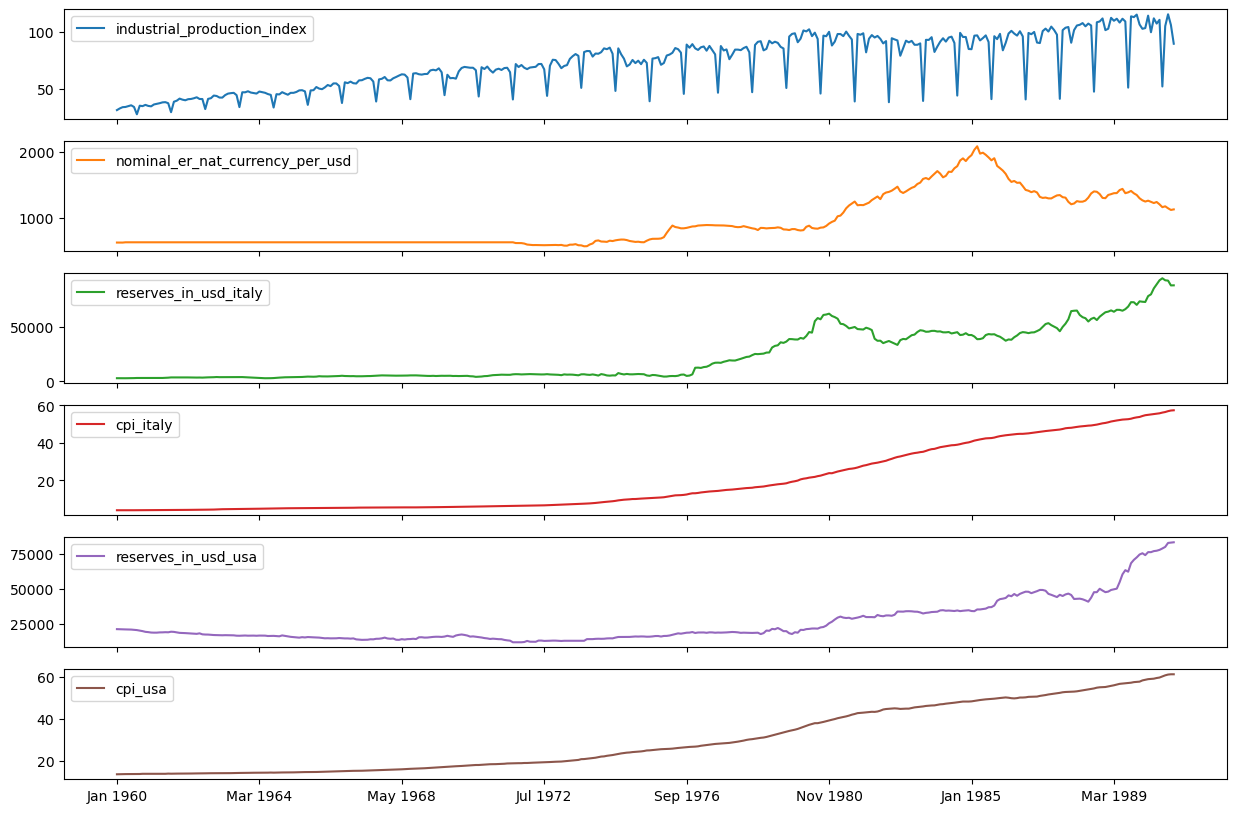

In [14]:
df.plot(subplots=True, figsize=(15, 10))

We notice that the industrial production index experiences a significant drop in a cyclical fashion, from the plot above. On closer inspection, we note that this drop always takes place during August. This could perhaps be explained by seasonality, with August being the start of summer which could have affected industrial production significantly in the past. Since this drop happens predictably, we will not consider it as an outlier.

## 3. Construct Variables

We will now construct the following variables as per the coursework instructions:

1. The monthly growth in the nominal exchange rate
2. The real exchange rate
3. The monthly growth in the real exchange rate
4. The monthly inflation rate
5. The monthly growth in industrial production
6. The growth in industrial production versus 12 months ago (i.e. January 1971 versus January 1970 etc.)
7. An index of the value of international reserves (value of reserves at January 1960 = 100)

These will go into a separate dataframe.

### 3.1 Monthly Nominal Exchange Rate Growth

The monthly growth in the nominal exchange rate is calculated as the percentage change in the nominal exchange rate from the previous month.

$$ \text{Monthly NER Growth} = \frac{ER_t - ER_{t-1}}{ER_{t-1}} \times 100 $$

We can use the `pct_change()` method in `pandas` to calculate this.

In [15]:
variables_df = pd.DataFrame()
variables_df['nominal_er_growth_rate'] = df['nominal_er_nat_currency_per_usd'].pct_change() * 100

### 3.2 Real Exchange Rate

We note that the nominal exchange rate is calculated as the number of Italian Lira per 1 US Dollar.

The real exchange rate is calculated as the nominal exchange rate multiplied by the ratio of the price index in Italy to the price index in the USA.

$$ ER^{L/\$}_{real} = ER^{L/\$}_{nominal} \times \frac{P_{US}}{P_{Italy}} $$

In [16]:
variables_df['real_er_nat_currency_per_usd'] = df['nominal_er_nat_currency_per_usd'] * df['cpi_usa'] / df['cpi_italy']

### 3.3 Monthly Real Exchange Rate Growth

We can use the same method as in 3.1 to calculate the monthly growth in the real exchange rate.

In [17]:
variables_df['real_er_growth_rate'] = variables_df['real_er_nat_currency_per_usd'].pct_change() * 100

### 3.4 Monthly Inflation Rate (Italy and USA)

$$ \pi = \frac{CPI_t - CPI_{t-1}}{CPI_{t-1}} \times 100  $$

In [18]:
variables_df['inflation_rate_italy'] = df['cpi_italy'].pct_change() * 100
variables_df['inflation_rate_usa'] = df['cpi_usa'].pct_change() * 100

### 3.5 Monthly Growth in Industrial Production

In [19]:
variables_df['industrial_production_1m_growth_rate'] = df['industrial_production_index'].pct_change() * 100

### 3.6 Growth in Industrial Production versus 12 months ago

To measure the growth in industrial production versus 12 months ago, we can override the `periods` parameter (which has a default of 1) in the `pct_change()` method.

In [20]:
variables_df['industrial_production_12m_growth_rate'] = df['industrial_production_index'].pct_change(periods=12) * 100

### 3.7 Index of the Value of International Reserves

To calculate the indexed value of international reserves in a particular month, we can use the following formula:

$$ \text{Indexed Reserves} = \frac{\text{Reserves in Month}}{\text{Reserves in January 1960}} \times 100 $$

In [21]:
jan_1960_reserves_italy = df['reserves_in_usd_italy'].iloc[0]
variables_df['reserves_index_italy'] = df['reserves_in_usd_italy'] / jan_1960_reserves_italy * 100

jan_1960_reserves_usa = df['reserves_in_usd_usa'].iloc[0]
variables_df['reserves_index_usa'] = df['reserves_in_usd_usa'] / jan_1960_reserves_usa * 100

In [22]:
variables_df.head()

,nominal_er_growth_rate,real_er_nat_currency_per_usd,real_er_growth_rate,inflation_rate_italy,inflation_rate_usa,industrial_production_1m_growth_rate,industrial_production_12m_growth_rate,reserves_index_italy,reserves_index_usa
Jan 1960,NaN,2014.007182,NaN,NaN,NaN,NaN,NaN,100.000000,100.000000
Feb 1960,0.000000,2024.392651,0.515662,-0.173471,0.341297,4.716258,NaN,98.963037,99.616353
Mar 1960,-0.083400,2026.224791,0.090503,-0.173746,0.000000,3.405346,NaN,97.792273,99.378902
Apr 1960,0.708991,2049.315269,1.139581,-0.087050,0.340136,0.531161,NaN,98.996488,99.068353
May 1960,0.000000,2045.751037,-0.173923,0.174226,0.000000,2.183868,NaN,99.364442,98.864890


## 4. Combine All Data

### 4.1 Merge All Data

In [23]:
combined_df = pd.merge(df, variables_df, left_index=True, right_index=True)

### 4.2 Reformat and Reorder Columns

We reformat the date column to a `datetime` object and reorder the columns for easier inspection.

In [24]:
combined_df["date"] = combined_df.index
combined_df.reset_index(inplace=True, drop=True)

In [25]:
combined_df['date'] = pd.to_datetime(combined_df['date'])

C:\Users\Zicheng Liu\AppData\Local\Temp\ipykernel_34760\756442684.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['date'] = pd.to_datetime(combined_df['date'])


In [26]:
combined_df.columns

Index(['industrial_production_index', 'nominal_er_nat_currency_per_usd',
       'reserves_in_usd_italy', 'cpi_italy', 'reserves_in_usd_usa', 'cpi_usa',
       'nominal_er_growth_rate', 'real_er_nat_currency_per_usd',
       'real_er_growth_rate', 'inflation_rate_italy', 'inflation_rate_usa',
       'industrial_production_1m_growth_rate',
       'industrial_production_12m_growth_rate', 'reserves_index_italy',
       'reserves_index_usa', 'date'],
      dtype='object')

In [27]:
ordered_columns = [
    'date',
    'industrial_production_index',
    'industrial_production_1m_growth_rate',
    'industrial_production_12m_growth_rate',
    'nominal_er_nat_currency_per_usd',
    'nominal_er_growth_rate',
    'real_er_nat_currency_per_usd',
    'real_er_growth_rate',
    'reserves_in_usd_italy',
    'reserves_index_italy',
    'reserves_in_usd_usa',
    'reserves_index_usa',
    'cpi_italy',
    'inflation_rate_italy',
    'cpi_usa',
    'inflation_rate_usa'
]

combined_df = combined_df[ordered_columns]

In [28]:
combined_df

,date,industrial_production_index,industrial_production_1m_growth_rate,industrial_production_12m_growth_rate,nominal_er_nat_currency_per_usd,nominal_er_growth_rate,real_er_nat_currency_per_usd,real_er_growth_rate,reserves_in_usd_italy,reserves_index_italy,reserves_in_usd_usa,reserves_index_usa,cpi_italy,inflation_rate_italy,cpi_usa,inflation_rate_usa
0,1960-01-01,31.134278,NaN,NaN,621.118012,NaN,2014.007182,NaN,2989.500000,100.000000,21478.100000,100.000000,4.143942,NaN,13.436946,NaN
1,1960-02-01,32.602650,4.716258,NaN,621.118012,0.000000,2024.392651,0.515662,2958.500000,98.963037,21395.700000,99.616353,4.136754,-0.173471,13.482806,0.341297
2,1960-03-01,33.712883,3.405346,NaN,620.600000,-0.083400,2026.224791,0.090503,2923.500000,97.792273,21344.700000,99.378902,4.129566,-0.173746,13.482806,0.000000
3,1960-04-01,33.891953,0.531161,NaN,625.000001,0.708991,2049.315269,1.139581,2959.500000,98.996488,21278.000000,99.068353,4.125971,-0.087050,13.528666,0.340136
4,1960-05-01,34.632109,2.183868,NaN,625.000001,0.000000,2045.751037,-0.173923,2970.500000,99.364442,21234.300000,98.864890,4.133160,0.174226,13.528666,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,1990-08-01,51.945660,-53.078203,1.975400,1158.680000,-3.579928,1245.387288,-3.353602,94282.568583,3153.790553,78908.838357,367.392080,56.149763,0.683910,60.351608,0.920245
368,1990-09-01,105.180751,102.482270,-7.558584,1171.700000,1.123692,1263.234717,1.433083,92443.529313,3092.273936,80024.166133,372.584941,56.446401,0.528298,60.856066,0.835866
369,1990-10-01,115.588303,9.894921,2.221204,1141.680000,-2.562089,1228.147799,-2.777545,92157.185028,3082.695602,82852.196532,385.751982,56.912541,0.825811,61.222946,0.602864
370,1990-11-01,106.193875,-8.127490,-7.895455,1116.310000,-2.222164,1196.427796,-2.582751,87764.009459,2935.742079,83059.402774,386.716715,57.251568,0.595698,61.360525,0.224719


## 4. Handling Missing Data

In [29]:
combined_df.isna().sum()

date                                      0
industrial_production_index               0
industrial_production_1m_growth_rate      1
industrial_production_12m_growth_rate    12
nominal_er_nat_currency_per_usd           0
nominal_er_growth_rate                    1
real_er_nat_currency_per_usd              0
real_er_growth_rate                       1
reserves_in_usd_italy                     0
reserves_index_italy                      0
reserves_in_usd_usa                       0
reserves_index_usa                        0
cpi_italy                                 0
inflation_rate_italy                      1
cpi_usa                                   0
inflation_rate_usa                        1
dtype: int64

From before, there is no missing data for the raw indicators, but the constructed indicators have missing data:
- 1-month industrial production growth rate
- 12-month industrial production growth rate
- 1-month real exchange rate growth rate
- 1-month nominal exchange rate growth rate
- monthly inflation rates for both countries

These missing values are due to the fact that the first month of the dataset does not have a previous month to compare to. For the 12-month industrial production growth rate, the first 12 months of the dataset do not have a previous year to compare to as the data was not downloaded. Hence, there is no way to interpolate these values using means. We will leave them as `NaN` values.

In [30]:
combined_df.to_csv('data/IMF_Italy_US.csv', index=False)

In [31]:
combined_df.to_excel('data/IMF_US_Italy_Variables.xlsx', index=False)
pd.options.display.max_rows = 999
combined_df.head(combined_df.shape[0]) # display all rows

,date,industrial_production_index,industrial_production_1m_growth_rate,industrial_production_12m_growth_rate,nominal_er_nat_currency_per_usd,nominal_er_growth_rate,real_er_nat_currency_per_usd,real_er_growth_rate,reserves_in_usd_italy,reserves_index_italy,reserves_in_usd_usa,reserves_index_usa,cpi_italy,inflation_rate_italy,cpi_usa,inflation_rate_usa
0,1960-01-01,31.134278,NaN,NaN,621.118012,NaN,2014.007182,NaN,2989.500000,100.000000,21478.100000,100.000000,4.143942,NaN,13.436946,NaN
1,1960-02-01,32.602650,4.716258,NaN,621.118012,0.000000e+00,2024.392651,0.515662,2958.500000,98.963037,21395.700000,99.616353,4.136754,-0.173471,13.482806,0.341297
2,1960-03-01,33.712883,3.405346,NaN,620.600000,-8.340000e-02,2026.224791,0.090503,2923.500000,97.792273,21344.700000,99.378902,4.129566,-0.173746,13.482806,0.000000
3,1960-04-01,33.891953,0.531161,NaN,625.000001,7.089914e-01,2049.315269,1.139581,2959.500000,98.996488,21278.000000,99.068353,4.125971,-0.087050,13.528666,0.340136
4,1960-05-01,34.632109,2.183868,NaN,625.000001,0.000000e+00,2045.751037,-0.173923,2970.500000,99.364442,21234.300000,98.864890,4.133160,0.174226,13.528666,0.000000
5,1960-06-01,35.372264,2.137194,NaN,625.000001,0.000000e+00,2052.685786,0.338983,2997.500000,100.267603,21169.800000,98.564584,4.133160,0.000000,13.574526,0.338983
6,1960-07-01,33.891953,-4.184948,NaN,625.000001,0.000000e+00,2043.799457,-0.432912,3088.500000,103.311591,20999.400000,97.771218,4.151131,0.434795,13.574526,0.000000
7,1960-08-01,27.445439,-19.020782,NaN,625.000001,0.000000e+00,2040.266853,-0.172845,3201.500000,107.091487,20803.400000,96.858661,4.158318,0.173144,13.574526,0.000000
8,1960-09-01,35.002186,27.533710,NaN,625.000001,0.000000e+00,2042.031627,0.086497,3193.500000,106.823884,20430.000000,95.120146,4.154724,-0.086422,13.574526,0.000000
9,1960-10-01,34.632109,-1.057299,NaN,625.000001,0.000000e+00,2055.829138,0.675676,3174.500000,106.188326,20068.200000,93.435639,4.154724,0.000000,13.666246,0.675676


# 5. Plot Graphs

All section numbers will follow that of the coursework instructions.

## 5.3 Analysis

### 5.3.1 Exchange Rate and International Reserve Graphs

#### Nominal ER Growth Rate

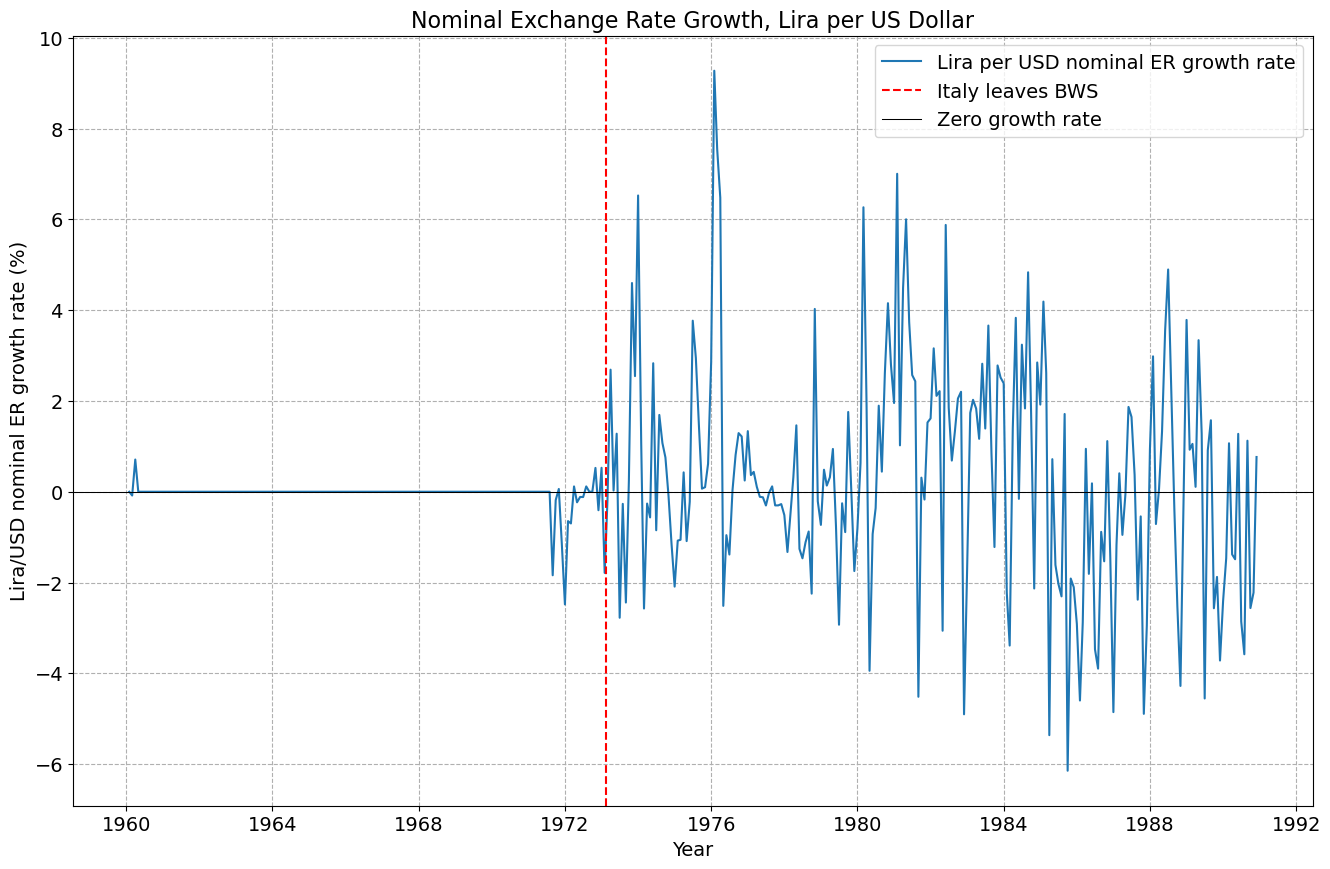

In [32]:
# Plot a time series graph of the monthly growth in nominal exchange rates of your country, versus the US dollar.
plt.plot(combined_df['date'], combined_df['nominal_er_growth_rate'], label='Lira per USD nominal ER growth rate')
plt.grid(True, which='both', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Lira/USD nominal ER growth rate (%)', fontsize=14)
plt.title('Nominal Exchange Rate Growth, Lira per US Dollar', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 10)
# draw vertical line at the end of the Bretton Woods System and show the label
plt.axvline(x=pd.to_datetime("1973-02-13"), color='r', linestyle='--', label='Italy leaves BWS')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.75, label='Zero growth rate')
plt.legend(fontsize=14)
# save the graph
plt.savefig('./images/nominal_er_growth_rate.png')
plt.show()

### Real ER Growth Rate

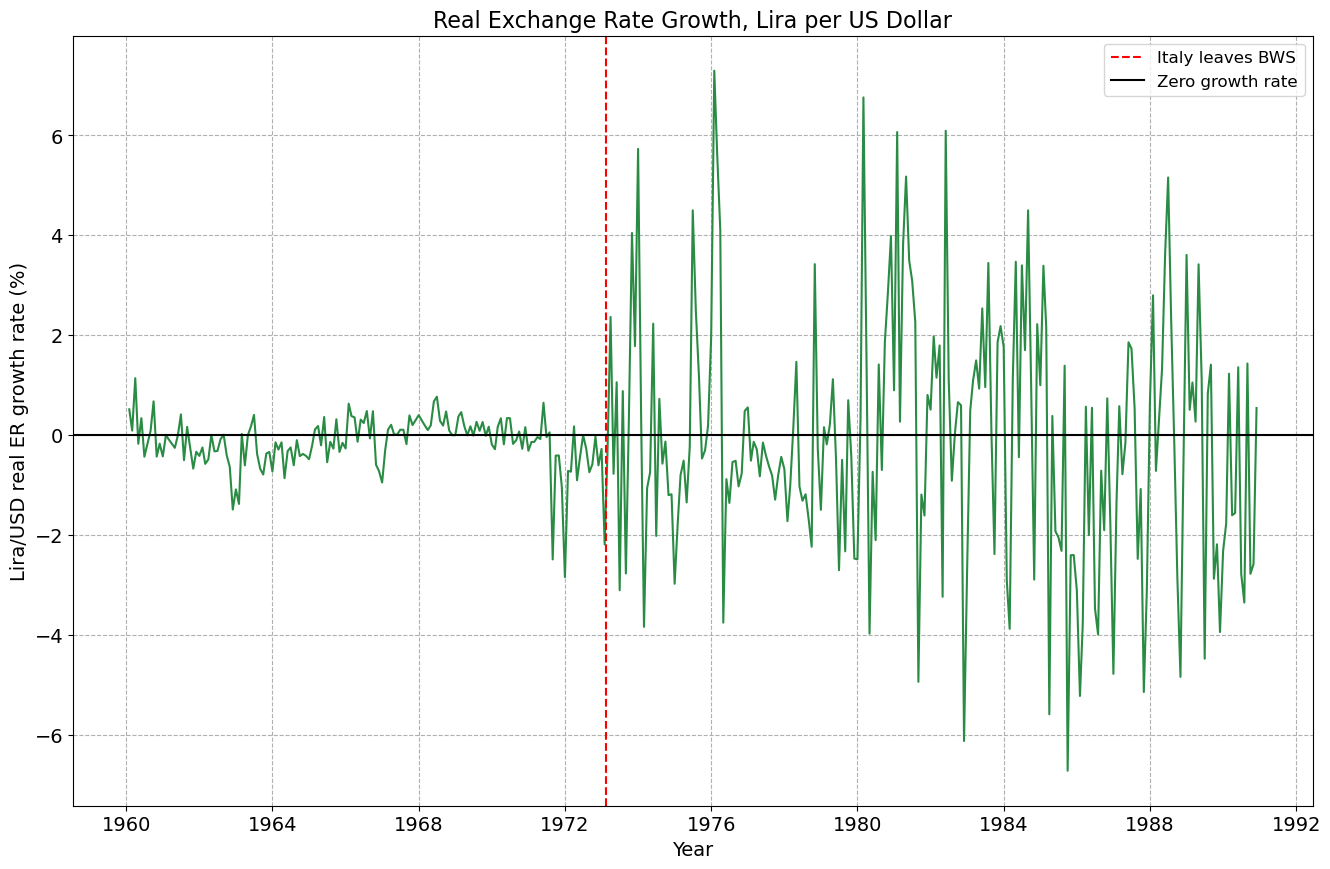

In [33]:
# Plot a time series graph of the monthly growth in real exchange rates of your country, versus the US dollar.
plt.plot(combined_df['date'], combined_df['real_er_growth_rate'], color='#2a8c44')
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Lira/USD real ER growth rate (%)', fontsize=14)
plt.title('Real Exchange Rate Growth, Lira per US Dollar', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 10)
# draw vertical line at the end of the Bretton Woods System
plt.axvline(x=pd.to_datetime("1973-02-13"), color='r', linestyle='--', label='Italy leaves BWS')
# draw a horizontal line at exchange rate growth rate of 0
plt.axhline(y=0, color='black', linestyle='-', label='Zero growth rate')
plt.legend(fontsize=12)
# save the graph
plt.savefig('./images/real_er_growth_rate.png')
plt.show()

### Nominal and Real Exchange Rates

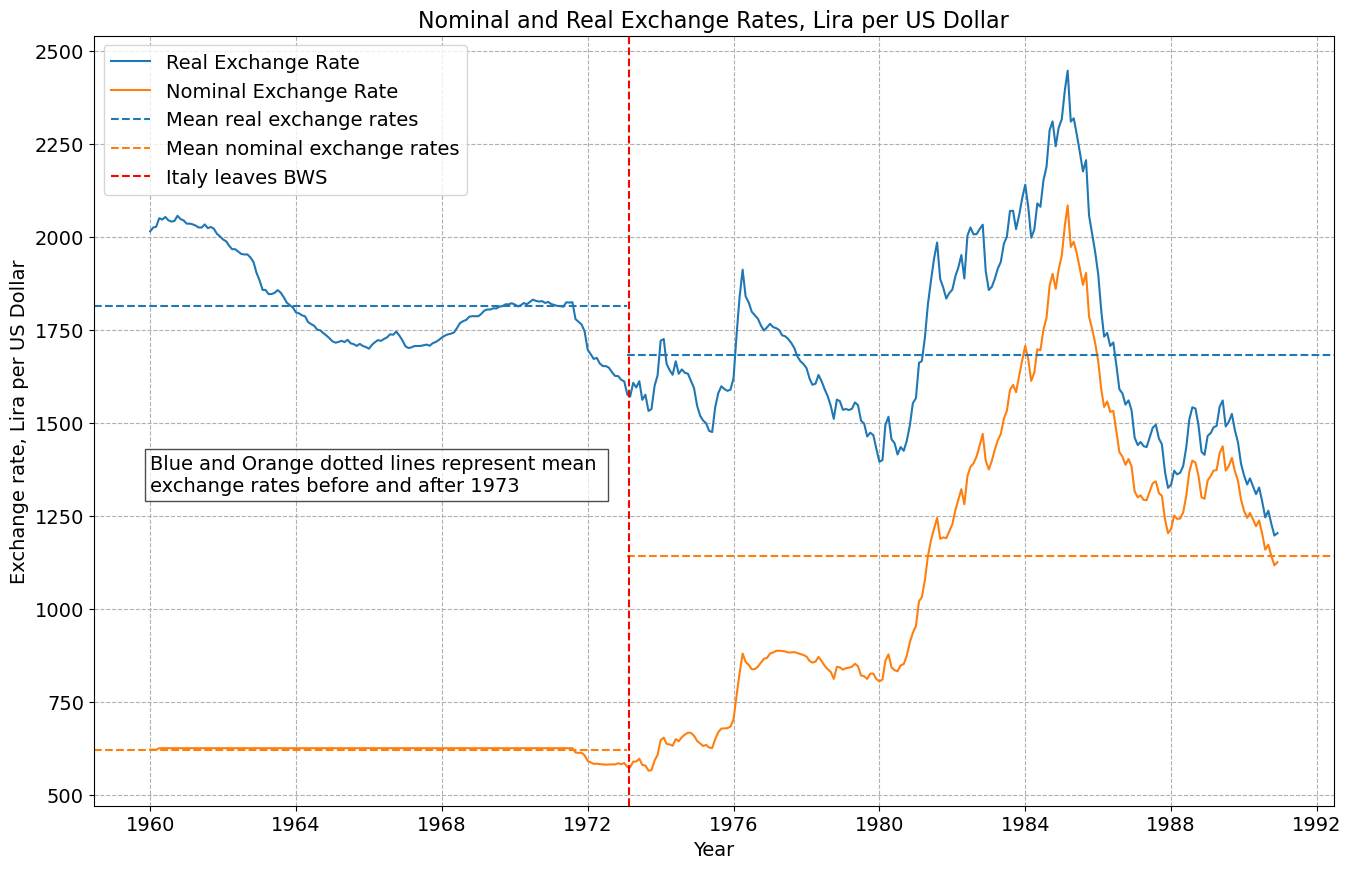

In [34]:
# Plot a time series graph of the real exchange rate level of your country, versus the US dollar.
plt.plot(combined_df['date'], combined_df['real_er_nat_currency_per_usd'], label='Real Exchange Rate')
plt.plot(combined_df['date'], combined_df['nominal_er_nat_currency_per_usd'], label='Nominal Exchange Rate')
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')

bef_1973_mean_real = combined_df[combined_df['date'] < '1973-02-13']['real_er_nat_currency_per_usd'].mean()
aft_1973_mean_real = combined_df[combined_df['date'] >= '1973-02-13']['real_er_nat_currency_per_usd'].mean()
bef_1973_mean_nominal = combined_df[combined_df['date'] < '1973-02-13']['nominal_er_nat_currency_per_usd'].mean()
aft_1973_mean_nominal = combined_df[combined_df['date'] >= '1973-02-13']['nominal_er_nat_currency_per_usd'].mean()


# draw horizontal lines at the mean inflation rate before and after 1973
plt.axhline(y=bef_1973_mean_real, xmin=0, xmax=0.43, linestyle='--', label='Mean real exchange rates')
plt.axhline(y=aft_1973_mean_real, xmin=0.43, xmax=1, linestyle='--')

plt.axhline(y=bef_1973_mean_nominal, xmin=0, xmax=0.43, linestyle='--', color='#ff7f0e', label='Mean nominal exchange rates')
plt.axhline(y=aft_1973_mean_nominal, xmin=0.43, xmax=1, linestyle='--', color='#ff7f0e')

plt.text(combined_df['date'].min(), combined_df['nominal_er_nat_currency_per_usd'].min() + 750, 'Blue and Orange dotted lines represent mean \nexchange rates before and after 1973', fontsize=14, color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.xlabel('Year', fontsize=14)
plt.ylabel('Exchange rate, Lira per US Dollar', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Nominal and Real Exchange Rates, Lira per US Dollar', fontsize=16)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 10)
# draw vertical line at the end of the Bretton Woods System
plt.axvline(x=pd.to_datetime("1973-02-13"), color='r', linestyle='--', label='Italy leaves BWS')
plt.legend(fontsize=14)
plt.savefig('./images/real_nominal_er.png')
plt.show()

### Indexed Values of International Reserves for Italy and USA

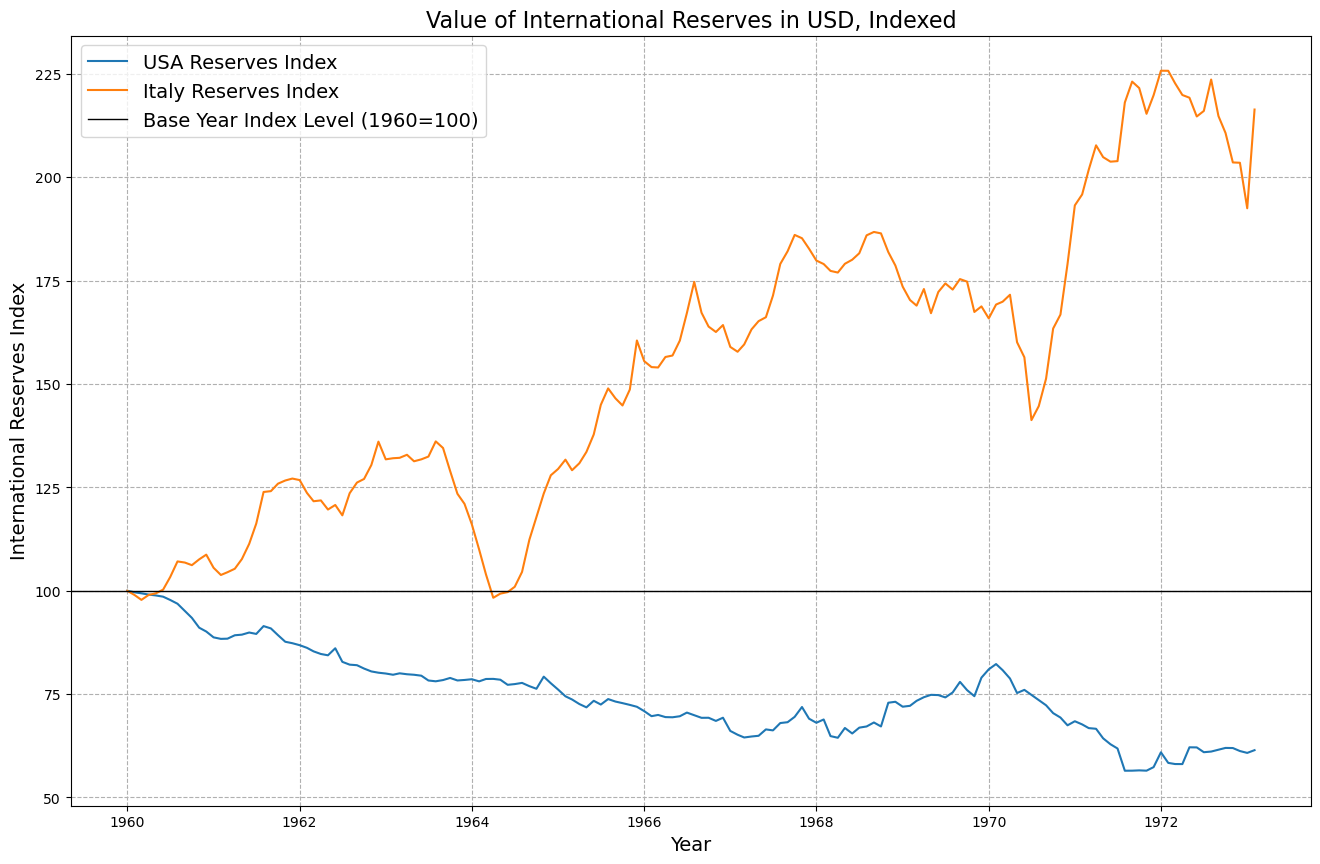

In [35]:
# Plot a time series graph of the monthly indexed value of international reserves of Italy and the monthly indexed value of international reserves of the US from January 1960 until the exit of the US from Bretton Woods (August 1971).git/

# filter the dataframe
filtered_df = combined_df[(combined_df['date'] >= '1960-01-01') & (combined_df['date'] <= '1973-02-13')]
plt.plot(filtered_df['date'], filtered_df['reserves_index_usa'], label='USA Reserves Index')
plt.plot(filtered_df['date'], filtered_df['reserves_index_italy'], label='Italy Reserves Index')
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('International Reserves Index', fontsize=14)
plt.title('Value of International Reserves in USD, Indexed', fontsize=16)
# make the graph bigger so that the x-axis is more readable
plt.gcf().set_size_inches(16, 10)
# draw vertical line at the end of the Bretton Woods System
plt.axhline(y=100, color='black', linestyle='-', linewidth=1, label='Base Year Index Level (1960=100)')
plt.legend(fontsize=14)
plt.savefig('./images/international_reserves_index.png')

### 5.3.2 Inflation and Industrial Production Graphs

#### Monthly inflation

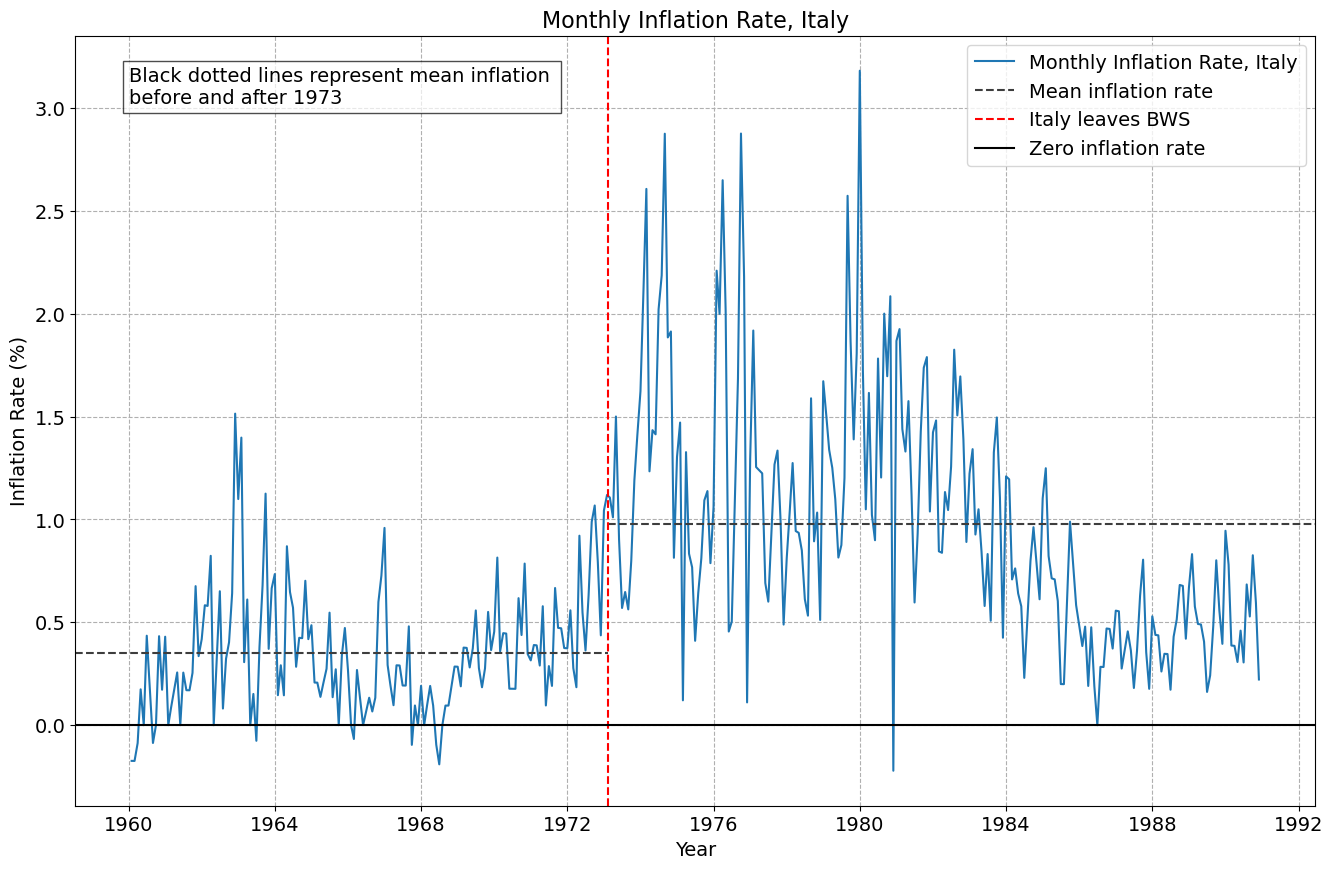

In [36]:
# Plot a time series graph of monthly inflation
plt.plot(combined_df['date'], combined_df['inflation_rate_italy'], label='Monthly Inflation Rate, Italy')

bef_1973_mean = combined_df[combined_df['date'] < '1973-02-13']['inflation_rate_italy'].mean()
aft_1973_mean = combined_df[combined_df['date'] >= '1973-02-13']['inflation_rate_italy'].mean()

# draw horizontal lines at the mean inflation rate before and after 1973
plt.axhline(y=bef_1973_mean, xmin=0, xmax=0.43, color='#3d3d3d', linestyle='--', label='Mean inflation rate')
plt.axhline(y=aft_1973_mean, xmin=0.43, xmax=1, color='#3d3d3d', linestyle='--')

plt.title('Monthly Inflation Rate, Italy', fontsize=16)
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Inflation Rate (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=pd.to_datetime('1973-02-13'), color='r', linestyle='--', label='Italy leaves BWS') # draw vertical line at the end of the Bretton Woods System
plt.axhline(y=0, color='black', linestyle='-', label='Zero inflation rate')
plt.legend(fontsize=14)

# add explanatory text to the graph
plt.text(combined_df['date'].min(), combined_df['inflation_rate_italy'].max() * 0.95, 'Black dotted lines represent mean inflation \nbefore and after 1973', fontsize=14, color='black', bbox=dict(facecolor='white', alpha=0.7))
plt.gcf().set_size_inches(16, 10)

plt.savefig('./images/monthly_inflation_rate.png')
plt.show()

#### Monthly growth in industrial production

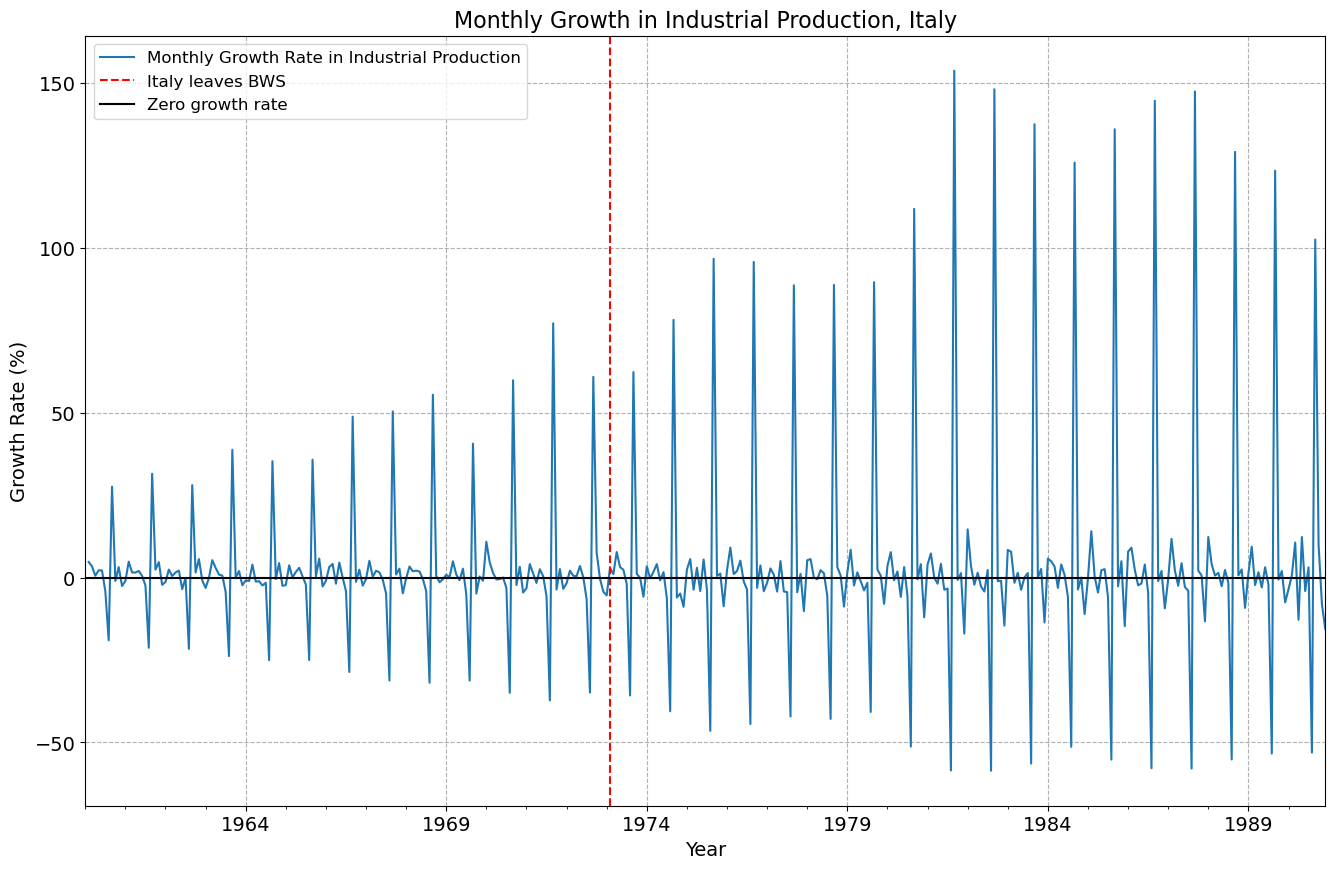

In [37]:
# Plot a time series graph of the monthly growth in industrial production
combined_df.plot(x='date', y='industrial_production_1m_growth_rate', figsize=(16, 10), label= 'Monthly Growth Rate in Industrial Production')
plt.title('Monthly Growth in Industrial Production, Italy', fontsize=16)
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=pd.to_datetime('1973-02-13'), color='r', linestyle='--', label='Italy leaves BWS') # draw vertical line at the end of the Bretton Woods System
plt.axhline(y=0, color='black', linestyle='-', label='Zero growth rate') # draw horizontal line at 0
plt.legend(fontsize=12)
plt.savefig('./images/monthly_growth_industrial_production.png')
plt.show()

#### Growth in industrial production versus 12 months ago

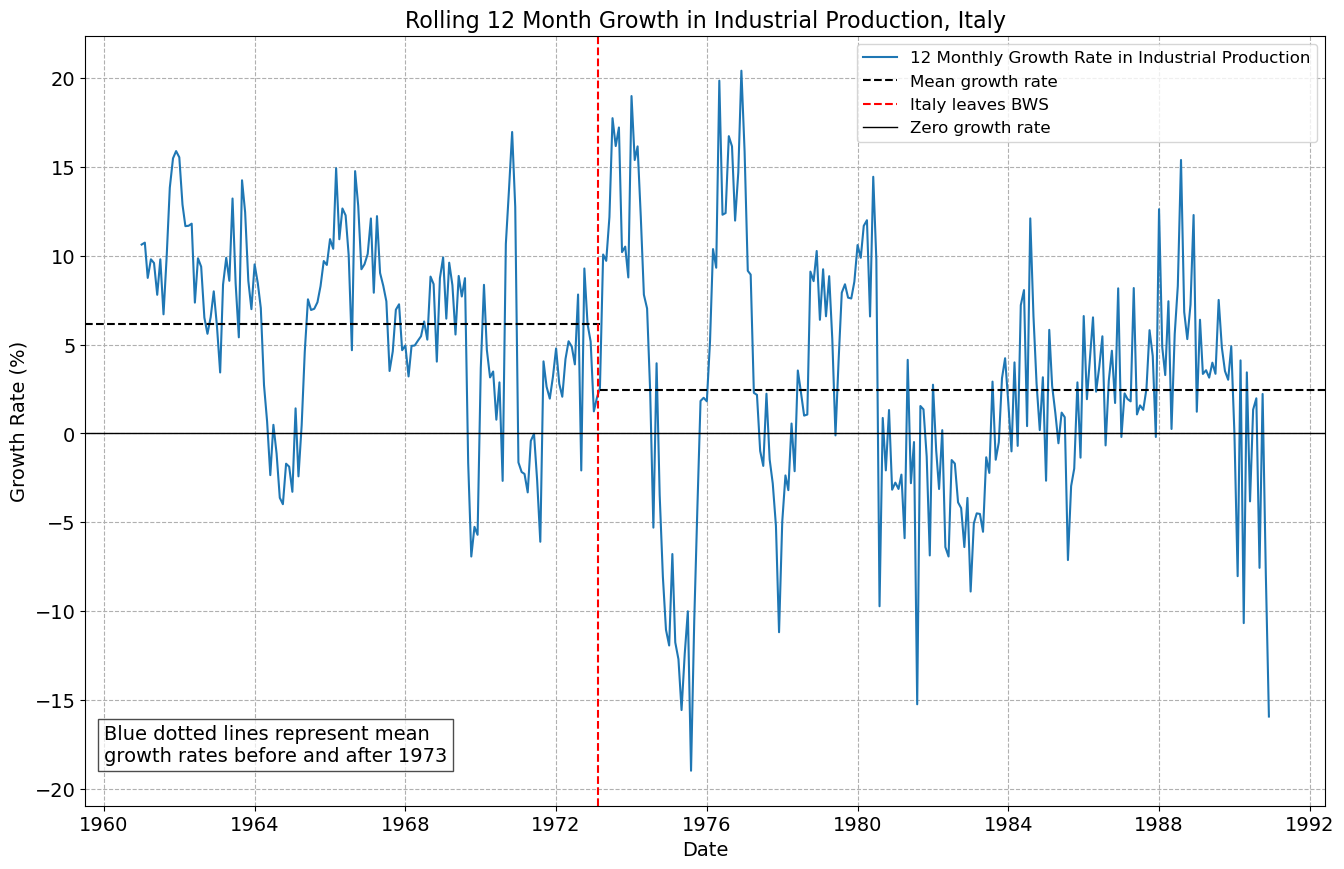

In [38]:
# Plot a time series graph of the growth in industrial production versus 12 months ago
plt.plot(combined_df['date'], combined_df['industrial_production_12m_growth_rate'], label='12 Monthly Growth Rate in Industrial Production')

bef_1973_mean_real = combined_df[combined_df['date'] < '1973-02-13']['industrial_production_12m_growth_rate'].mean()
aft_1973_mean_real = combined_df[combined_df['date'] >= '1973-02-13']['industrial_production_12m_growth_rate'].mean()

plt.axhline(y=bef_1973_mean_real, xmin=0, xmax=0.415, linestyle='--',color='k', label='Mean growth rate')
plt.axhline(y=aft_1973_mean_real, xmin=0.415, xmax=1, linestyle='--', color='k')

plt.text(combined_df['date'].min(), combined_df['industrial_production_12m_growth_rate'].min() + 0.5, 'Blue dotted lines represent mean \ngrowth rates before and after 1973', fontsize=14, color='black', bbox=dict(facecolor='white', alpha=0.7))

plt.title('Rolling 12 Month Growth in Industrial Production, Italy', fontsize=16)
plt.grid(True, which='major', linestyle='--', color='#b0b0b0')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Growth Rate (%)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axvline(x=pd.to_datetime('1973-02-13'), color='r', linestyle='--', label='Italy leaves BWS') # draw vertical line at the end of the Bretton Woods System
plt.axhline(y=0, color='black', linestyle='-', linewidth=1, label='Zero growth rate')
plt.legend(fontsize=12)
plt.gcf().set_size_inches(16, 10)
plt.savefig('./images/rolling_12_month_growth_industrial_production_12m.png')
plt.show()

### 5.3.3 Comparison Statistics

In [39]:
df = pd.read_csv('./data/IMF_Italy_US.csv')

df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Define the split dates
start_date_1 = pd.Timestamp('1960-01-01')
end_date_1 = pd.Timestamp('1971-07-31')
start_date_2 = pd.Timestamp('1973-01-01')
end_date_2 = pd.Timestamp('1990-12-31')

# Split the DataFrame into two parts
df_before_bw = df[(df['date'] >= start_date_1) & (df['date'] <= end_date_1)]
df_after_bw = df[(df['date'] >= start_date_2) & (df['date'] <= end_date_2)]

#### Calculate Standard Deviation of Variables Before and After Bretton Woods

In [40]:
df_before_bw["inflation_rate_italy"]

0           NaN
1     -0.173471
2     -0.173746
3     -0.087050
4      0.174226
5      0.000000
6      0.434795
7      0.173144
8     -0.086422
9      0.000000
10     0.432512
11     0.172275
12     0.429934
13     0.000000
14     0.085609
15     0.171096
16     0.256193
17     0.000000
18     0.255513
19     0.169933
20     0.169645
21     0.254024
22     0.675664
23     0.335565
24     0.418072
25     0.582844
26     0.579466
27     0.823043
28     0.000000
29     0.326549
30     0.650924
31     0.080833
32     0.323096
33     0.402588
34     0.641529
35     1.513972
36     1.098894
37     1.397503
38     0.306273
39     0.610699
40     0.000000
41     0.151754
42    -0.075773
43     0.379086
44     0.679763
45     1.125267
46     0.370908
47     0.665194
48     0.734235
49     0.145759
50     0.291116
51     0.145146
52     0.869572
53     0.646535
54     0.571032
55     0.283884
56     0.424632
57     0.422836
58     0.701753
59     0.418122
60     0.485771
61     0.207184
62     0

In [41]:
vars_to_calc = ["nominal_er_growth_rate", "real_er_growth_rate", "inflation_rate_italy", "diff_inflation_rate", "industrial_production_12m_growth_rate"]

df_before_bw["diff_inflation_rate"] = df_before_bw["inflation_rate_italy"] - df_before_bw["inflation_rate_usa"]
df_after_bw["diff_inflation_rate"] = df_after_bw["inflation_rate_italy"] - df_after_bw["inflation_rate_usa"]
before_stdev_dict = {}
for var in vars_to_calc:
    before_stdev_dict[var] = [df_before_bw[var].std()]
after_stdev_dict = {}
for var in vars_to_calc:
    after_stdev_dict[var] = [df_after_bw[var].std()]

df_stdev_before_bw = pd.DataFrame(before_stdev_dict)
df_stdev_after_bw = pd.DataFrame(after_stdev_dict)

C:\Users\Zicheng Liu\AppData\Local\Temp\ipykernel_34760\2998406835.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_before_bw["diff_inflation_rate"] = df_before_bw["inflation_rate_italy"] - df_before_bw["inflation_rate_usa"]
C:\Users\Zicheng Liu\AppData\Local\Temp\ipykernel_34760\2998406835.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_after_bw["diff_inflation_rate"] = df_after_bw["inflation_rate_italy"] - df_after_bw["inflation_rate_usa"]


#### Combine and Rename the Data

In [42]:
df_before_after_stdev = pd.concat([df_stdev_before_bw, df_stdev_after_bw], axis=0)

# Rename the rows to before and after Bretton Woods
df_before_after_stdev.index = ["Before Bretton Woods", "After Bretton Woods"]

# Transpose the DataFrame so that variables are in rows
df_before_after_stdev = df_before_after_stdev.transpose()

# Calculate the ratio of the standard deviations
df_before_after_stdev["Ratio"] = df_before_after_stdev["After Bretton Woods"] / df_before_after_stdev["Before Bretton Woods"]

# Rename variables for better readability
df_before_after_stdev.index = [
    "Nominal ER Growth Rate",
    "Real ER Growth Rate",
    "Italy Inflation Rate",
    "Inflation Rate Difference",
    "Industrial Production 12m Growth Rate"
    ]

In [43]:
df_before_after_stdev

,Before Bretton Woods,After Bretton Woods,Ratio
Nominal ER Growth Rate,0.060821,2.516835,41.381074
Real ER Growth Rate,0.409116,2.472205,6.042803
Italy Inflation Rate,0.290847,0.601257,2.067262
Inflation Rate Difference,0.400794,0.559186,1.395195
Industrial Production 12m Growth Rate,5.260397,7.209651,1.370553


In [44]:
df_before_after_stdev.T

,Nominal ER Growth Rate,Real ER Growth Rate,Italy Inflation Rate,Inflation Rate Difference,Industrial Production 12m Growth Rate
Before Bretton Woods,0.060821,0.409116,0.290847,0.400794,5.260397
After Bretton Woods,2.516835,2.472205,0.601257,0.559186,7.209651
Ratio,41.381074,6.042803,2.067262,1.395195,1.370553
